## Podstawowe metody przetwarzania obrazu

In [2]:
import numpy as np                          
import matplotlib.pyplot as plt             
from skimage import io, color, exposure, filters, util, morphology
from skimage.metrics import structural_similarity as ssim

plt.rcParams["figure.figsize"] = (12, 4)     # Domyślny rozmiar rysunku: szerokość 12 cali, wysokość 4 cale

def show_row(images, titles=None, cmap=None):
    """
    Wyświetla kilka obrazów obok siebie w jednym wierszu.

    Parametry:
    -----------
    images : list
        Lista obrazów (tablic NumPy) do wyświetlenia.
    titles : list (opcjonalnie)
        Lista tytułów dla każdego obrazu.
    cmap : str (opcjonalnie)
        Mapa kolorów (np. 'gray' dla obrazów w skali szarości).
    """

    n = len(images)                          # Liczba obrazów
    fig, axes = plt.subplots(1, n)           # Tworzy jeden wiersz z n kolumnami (dla każdego obrazu jedna oś)

    # Iteracja po wszystkich obrazach i ich osiach
    for i, ax in enumerate(np.atleast_1d(axes)):
        ax.imshow(images[i], cmap=cmap[i])      # Wyświetla obraz (z opcjonalną mapą kolorów)
        ax.axis('off')                       # Ukrywa osie (ramki, skale, liczby)
        if titles:                           # Jeśli podano tytuły
            ax.set_title(titles[i])          # Ustawia tytuł nad obrazem

    plt.show()                               # Wyświetla całość


In [20]:
lena = io.imread("lena.png")

### Zadanie 1

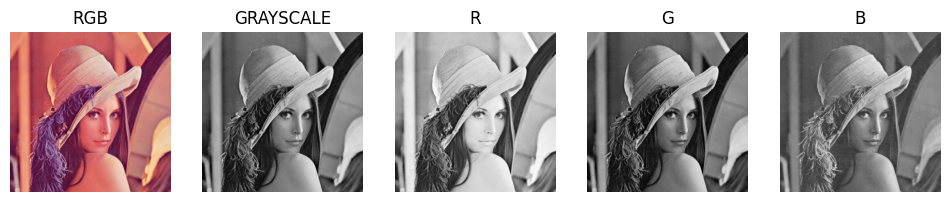

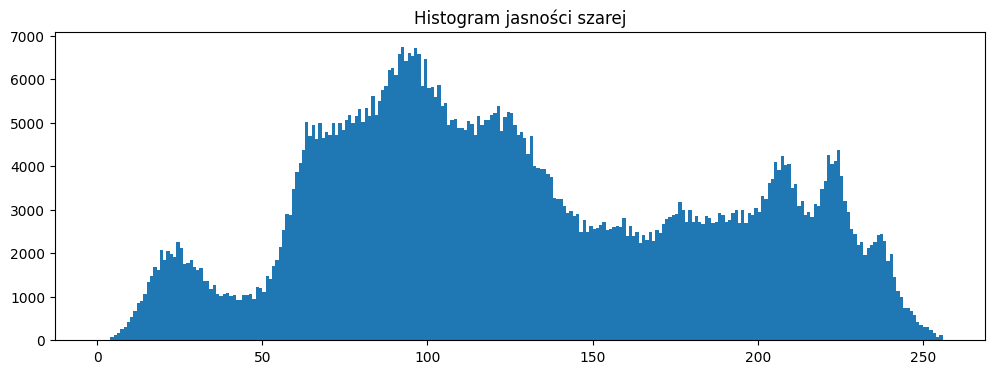

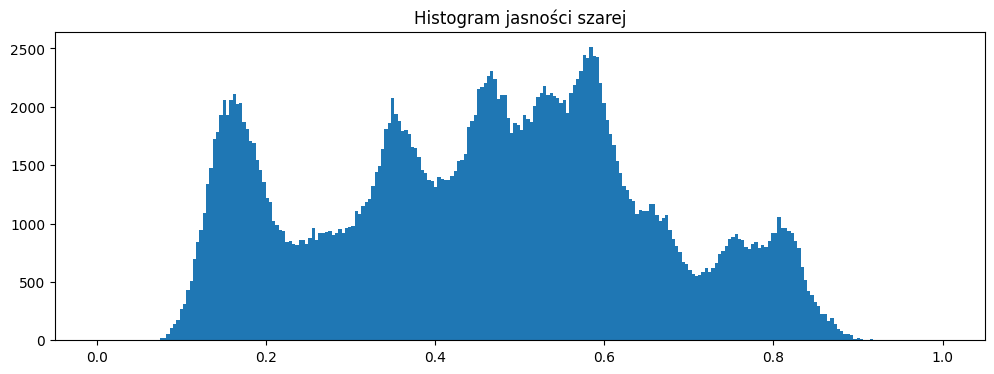

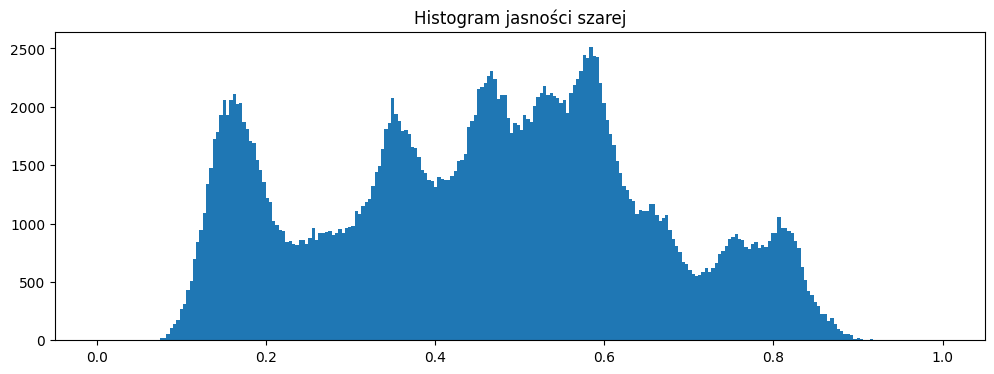

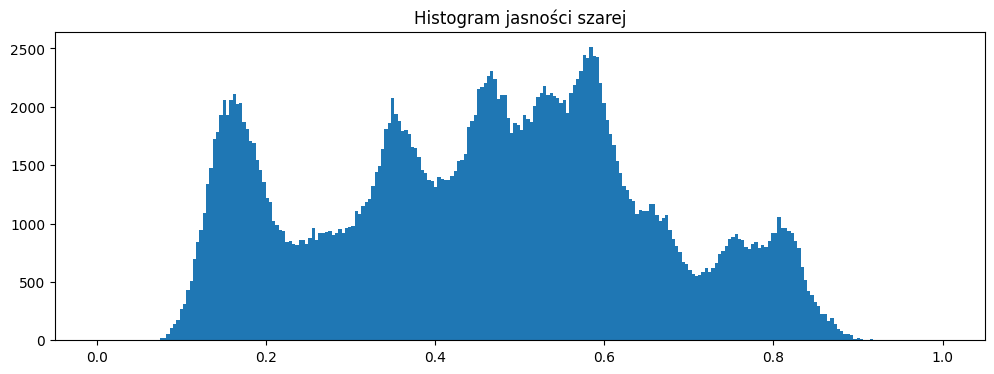

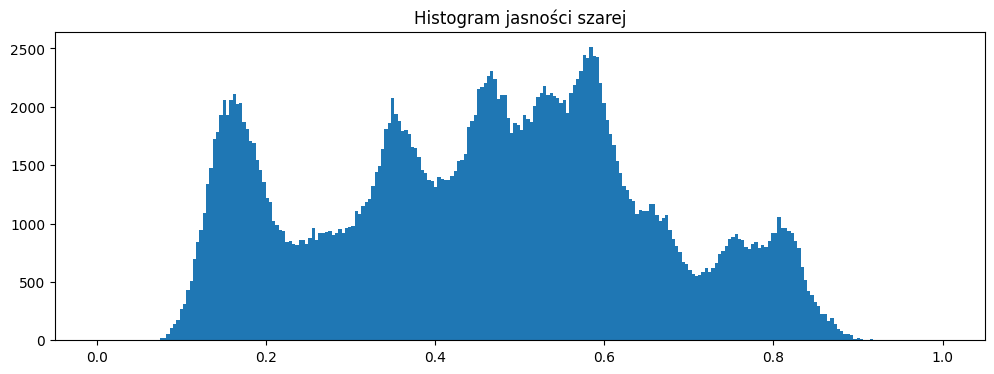

In [26]:
gray = color.rgb2gray(lena)


if lena.ndim == 2:
    img_rgb = np.stack([lena, lena, lena], axis=-1)  # Tworzy RGB z jednego kanału
else:
    img_rgb = lena[..., :3]  # Usuwa kanał alfa (jeśli istnieje), zachowując R, G, B

# ============================================
# a) Podgląd RGB i kanałów R / G / B
# ============================================
# Wyodrębnienie poszczególnych kanałów koloru z obrazu RGB.
r = img_rgb[..., 0]/256  # Kanał czerwony (Red)
g = img_rgb[..., 1]/256  # Kanał zielony (Green)
b = img_rgb[..., 2]/256  # Kanał niebieski (Blue)

# Wyświetlenie oryginalnego obrazu RGB oraz trzech kanałów R, G, B obok siebie.
# Kanały są pokazane w skali szarości, aby uwidocznić ich intensywność.
images = [lena, gray, r, g, b]
show_row(images,
          ['RGB', 'GRAYSCALE', 'R', 'G', 'B'],
          cmap=['gray', 'gray', 'gray', 'gray', 'gray'])

# ============================================
# b) Histogram jasności obrazu
# ============================================
# Konwersja z RGB do skali szarości – wykorzystuje wagowe przeliczenie ludzkiej percepcji jasności:
# Y = 0.2125 * R + 0.7154 * G + 0.0721 * B
# Wynik to obraz typu float z wartościami od 0 (czarny) do 1 (biały).

# Rysowanie histogramu rozkładu jasności pikseli.
# gray.ravel() spłaszcza obraz 2D do jednowymiarowej tablicy wszystkich wartości pikseli.


def histogram_jasnosci(images):
    for i, image in enumerate(images):
        plt.figure()
        if i == 0:
            plt.hist(image.ravel(), bins=256, range=(0, 256))  # 256 przedziałów dla jasności od 0 do 1
        else:
            plt.hist(gray.ravel(), bins=256, range=(0, 1))  # 256 przedziałów dla jasności od 0 do 1
        plt.title('Histogram jasności szarej')  # Tytuł wykresu


histogram_jasnosci(images)
plt.show()  # Wyświetlenie histogramu


images = [lena, gray, ]

In [27]:
for image in images:
    image = exposure.rescale_intensity(image, (min(image), max(image)))



ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()